### DATA DESCRIPTION: 


 
Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145157, 1990.). The model evaluates cars according to the following concept structure: 
 
CAR car acceptability 

. PRICE overall price 

. . buying buying price 

. . maint price of the maintenance 

. TECH technical characteristics 

. . COMFORT comfort 

. . . doors number of doors 

. . . persons capacity in terms of persons to carry 

. . . lug_boot the size of luggage boot 

. . safety estimated safety of the car 
 
Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples 

ATTRIBUTE INFORMATION: 

Class Values: unacc, acc, good, vgood 
 
Attributes: 
 
buying: vhigh, high, med, low. 

maint: vhigh, high, med, low. 

doors: 2, 3, 4, 5more. 

persons: 2, 4, more. 

lug_boot: small, med, big. 

safety: low, med, high. 

### 1.	Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [ ]:
# Kindly change the below cells from markdown to code and execute it 

In [2]:
import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)
    
df=pd.read_csv("data_set.csv")

df.head(10)


<IPython.core.display.Javascript object>

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


### 2.	Summarize important observations from the data set 

Some pointers which would help you, but don’t be limited by these

a.	Find out number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five-point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


The number of rows and columns are 1727 and 7 respectively

All the variables are of type 'object' indicating categorical variables

In [5]:
#since we don't have numeric variables we are calculating five-point summary for categorical variables
print("five-point summary for categorical variables")
df.describe(include="object")

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,4,more,med,high,unacc
freq,432,432,432,576,576,576,1209


In [7]:
print("Summary of observations for categorical variables ")
for col in df.columns:
    if df[col].dtype=="object":
        num_of_categories=df[col].nunique()
        cat_percentages=df[col].value_counts(normalize=True)*100
        print(f"{col}")
        print("number of categories:",num_of_categories)
        print("percentage observations in each category:",cat_percentages)
        print()

Summary of observations for categorical variables 
vhigh
number of categories: 4
percentage observations in each category: high     25.014476
low      25.014476
med      25.014476
vhigh    24.956572
Name: vhigh, dtype: float64

vhigh.1
number of categories: 4
percentage observations in each category: high     25.014476
low      25.014476
med      25.014476
vhigh    24.956572
Name: vhigh.1, dtype: float64

2
number of categories: 4
percentage observations in each category: 4        25.014476
5more    25.014476
3        25.014476
2        24.956572
Name: 2, dtype: float64

2.1
number of categories: 3
percentage observations in each category: more    33.352635
4       33.352635
2       33.294731
Name: 2.1, dtype: float64

small
number of categories: 3
percentage observations in each category: med      33.352635
big      33.352635
small    33.294731
Name: small, dtype: float64

low
number of categories: 3
percentage observations in each category: high    33.352635
med     33.352635
low    

### 3.	Check for defects in the data. Perform necessary actions to ‘fix’ these defects 

Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the Target distributed evenly? Is it a defect? If Yes, what steps are being taken to rectify the problem. 


In [8]:
missing_values=df.isnull().sum()
print("missing/null values in each variable:")
print(missing_values)

missing/null values in each variable:
vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64


We donot have missing values in any of records which is very good for model building

Since the dataset has only categorical columns ,outlier detection may not be relevant. Instead we can get frequency of categories and distribution visualisation


Column:vhigh
high     432
low      432
med      432
vhigh    431
Name: vhigh, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

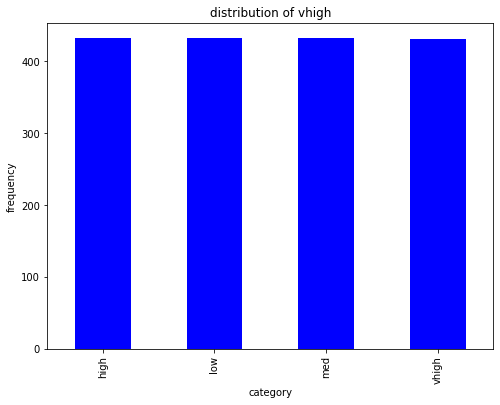


Column:vhigh.1
high     432
low      432
med      432
vhigh    431
Name: vhigh.1, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

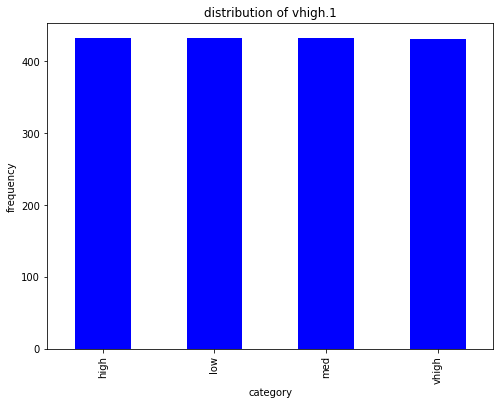


Column:2
4        432
5more    432
3        432
2        431
Name: 2, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

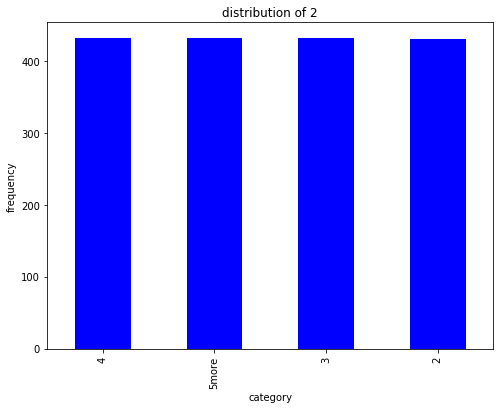


Column:2.1
more    576
4       576
2       575
Name: 2.1, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

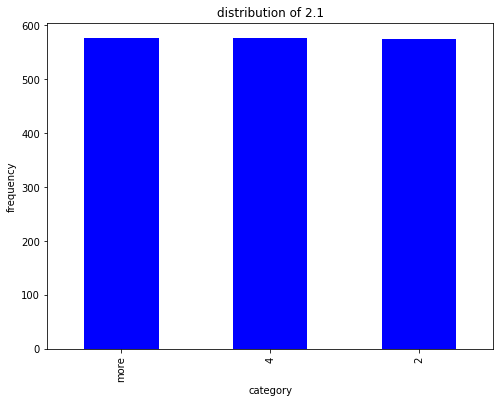


Column:small
med      576
big      576
small    575
Name: small, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

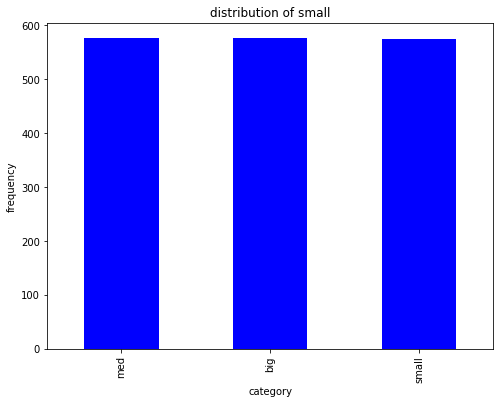


Column:low
high    576
med     576
low     575
Name: low, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

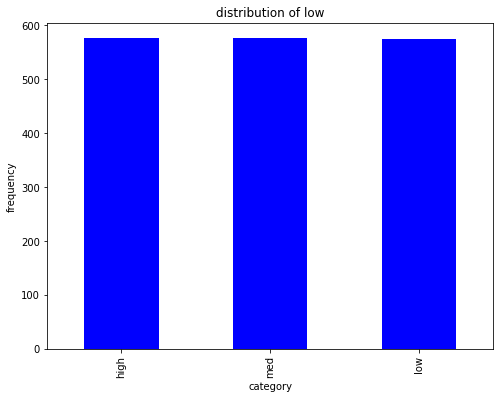


Column:unacc
unacc    1209
acc       384
good       69
vgood      65
Name: unacc, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

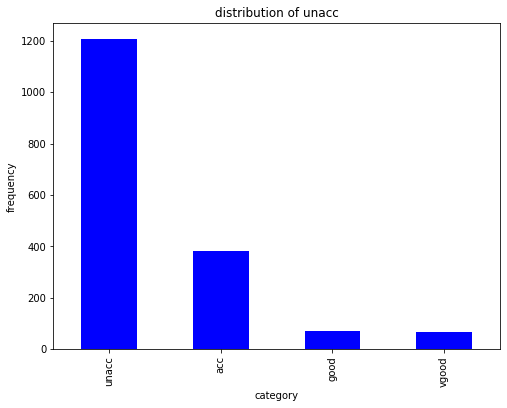

In [10]:
for col in df.columns:
    if df[col].dtype=="object":
        print(f"\nColumn:{col}")
        print(df[col].value_counts())
        plt.figure(figsize=(8,6))
        df[col].value_counts().plot(kind="bar",color="blue")
        plt.title(f"distribution of {col}")
        plt.xlabel("category")
        plt.ylabel("frequency")
        plt.show()

In [11]:
#here our target variable is df["unacc"]
print("distribution of target variable ")
df["unacc"].value_counts(normalize=True)


distribution of target variable 


unacc    0.700058
acc      0.222351
good     0.039954
vgood    0.037638
Name: unacc, dtype: float64

This indicates that the target variable is imbalanced , with the majority class being "unacc"

To address this we can use:

1)oversampling of minority class 

2)under sample majority class

3)SMOTE -synthetic minority oversampling technique


### 4.	Summarize relationships among variables 
a.	Plot relevant categorical plots. Find out which are the variables most correlated or appear to be in causation with Target? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?


b.	Plot all independent variables with the target & find out the relationship? Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable.

 Hint: based on your observations you may want to transform features or create additional features.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

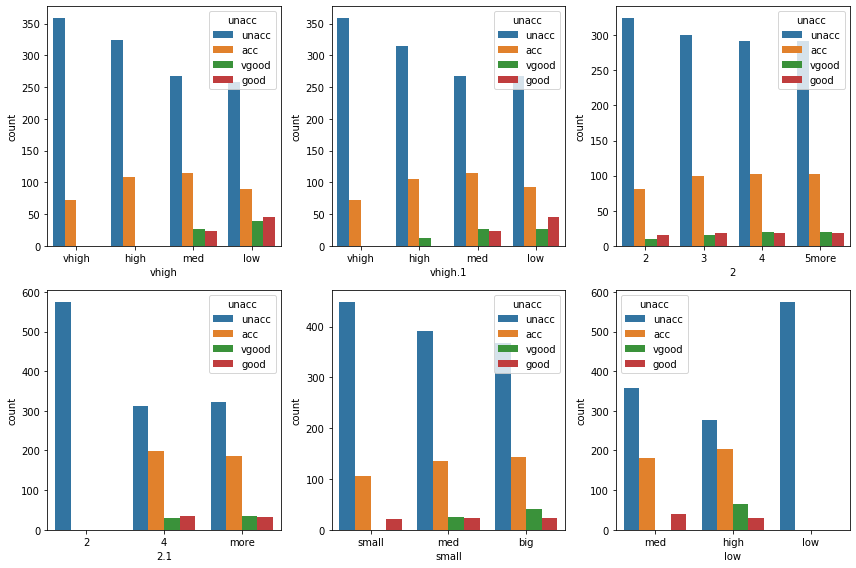

In [12]:
plt.figure(figsize=(12,8))
for i , col in enumerate(df.select_dtypes(include="object").columns[:-1],1):
    plt.subplot(2,3,i)
    sns.countplot(x=col,hue="unacc",data= df)
    
plt.tight_layout()
plt.show()

In [26]:
from scipy.stats import chi2_contingency
for  col in df.select_dtypes(include="object").columns[:-1]:
    contigency_table=pd.crosstab(df[col],df["unacc"])
    chi2,p_value,_,_=chi2_contingency(contigency_table)
    print(f"\nchiquare test for {col}")
    print(f"\nchiquare value  {chi2}")
    print(f"\p-value  {p_value}")
    

<IPython.core.display.Javascript object>


chiquare test for vhigh

chiquare value  188.8892399516746
\p-value  7.029416116370655e-36


<IPython.core.display.Javascript object>


chiquare test for vhigh.1

chiquare value  142.61049537014105
\p-value  2.9808687284632554e-26


<IPython.core.display.Javascript object>


chiquare test for 2

chiquare value  10.241889840045475
\p-value  0.33126023524505205


<IPython.core.display.Javascript object>


chiquare test for 2.1

chiquare value  370.7853885329821
\p-value  5.30659778660845e-77


<IPython.core.display.Javascript object>


chiquare test for small

chiquare value  53.08177977754241
\p-value  1.129629723303536e-09


<IPython.core.display.Javascript object>


chiquare test for low

chiquare value  478.7150645489695
\p-value  3.2287730970407905e-100


vhigh , vhigh.1, 2,2.1,small,low have very low p-value hence we reject null hypothesis and conclude that there is significant association between these variables and the target variable "unacc"
  
hence all variables are important for predicting the target class 

### 5.	Split dataset into train and test (70:30) (5 marks)
a.	Are both train and test representative of the overall data? How would you ascertain this statistically?


In [27]:
from sklearn.model_selection import train_test_split

X=df.drop(columns=["unacc"])
y=df["unacc"]

X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [28]:
X_train.describe()

,vhigh,vhigh.1,2,2.1,small,low
count,1208,1208,1208,1208,1208,1208
unique,4,4,4,3,3,3
top,low,vhigh,2,4,big,med
freq,313,305,320,416,412,409


In [29]:
y_train.describe()

count      1208
unique        4
top       unacc
freq        837
Name: unacc, dtype: object

In [31]:
X_test.describe()

,vhigh,vhigh.1,2,2.1,small,low
count,519,519,519,519,519,519
unique,4,4,4,3,3,3
top,vhigh,high,5more,more,med,high
freq,138,136,144,182,188,180


In [32]:
y_test.describe()

count       519
unique        4
top       unacc
freq        372
Name: unacc, dtype: object

we have split the data into training and test data. The training set contain known output and model learns on this data in order to  be generalized to other data later on.

we have test data in order to test our model's prediction on this subset

random state: if we dont mention it in code, each time different set of values are paased into the train and test datasets whenever we execute the code

If we use a particular value for random_state then same data points will be passed  into the train and test datasets and output will be same

### 6.	Fit a base model and explain the reason of selecting that model. Please write your key observations

a.	What is the overall Accuracy? Please comment on whether it is good or not. 

b.	What is Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement.

c.	Which variables are significant?

d.	What is Cohen’s Kappa Value and what inference do you make from the model
e.	Which other key model output parameters do you want to look at? 


I will use multinomial logistic regression because it can handle multiclass classification problems, such as the one with four subcategories in the target variable "unacc"

It directly models the probabilities of each class and is computationally efficient for medium sized dataset, making it suitable for this problem

It also provides interpretable coefficients , allowing me to analyse the impact of features on each category of the target



In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

encoder=OneHotEncoder()
X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)

In [35]:
imputer =SimpleImputer()
X_train=imputer.fit_transform(X_train)
X_test=imputer.transform(X_test)

In [37]:
scaler=StandardScaler(with_mean=False)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [38]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,cohen_kappa_score,f1_score

model=LogisticRegression(multi_class="multinomial",solver="lbfgs", random_state= 100)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

accurracy= accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred, average="weighted")
recall=recall_score(y_test,y_pred, average="weighted")
f1=f1_score(y_test,y_pred, average="weighted")
kappa=cohen_kappa_score(y_test,y_pred)

print("accurracy",accurracy)
print("precision",precision)
print('recall',recall)
print("f1_score",f1)
print("cohen_kappa_score",kappa)

accurracy 0.9248554913294798
precision 0.9242517183494792
recall 0.9248554913294798
f1_score 0.9236417895343927
cohen_kappa_score 0.830038961475162


/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


accuracy=(number of correct predictions/total number of predictions )*100

The overall  accuracy of the model is approximately 92.49%. 
This indicates that the model correctly predicted the class for around 92.49% . usually  accuracy above 90% is considered as good

Precision: measures the propotion of true postives out of all positives. Here Precision is 92.43% indicating that when the model predicts certain class, it is correct  approximately 92.43% of the time

Recall: measures the propotion of true postives out of actual  positives. Here recall is 92.49% indicating that the model correctly identifies  approximately 92.495 of actual positive instances

F1 score: is harmonic mean of precision and recall.. here it is 92.36% . A higher f1 score indicates better balance between precision and recall

Cohen kappa value  : is around 0.83 . it measures the agreement between the actual and predicted classes. A value close to 1 indicate substancial agreement beyond chance.In our case we can say that there is substancial agreement beyond chance

In [56]:
coefficients=model.coef_
coefficients

array([[ 7.03948337e-01, -7.59223342e-01, -3.27954435e-01,
         4.47427964e-01,  3.18221287e-01, -6.57432710e-01,
        -2.71284495e-01,  6.67412094e-01,  5.43284646e-02,
         2.25709581e-03, -2.72455422e-02,  2.47756141e-02,
        -5.39841823e-01,  3.41432540e-01,  2.45806961e-01,
        -2.86441770e-01, -1.10178556e-01,  4.46086578e-01,
        -3.14440776e-02, -7.16415609e-01,  7.95153095e-01],
       [-7.60665739e-01,  1.01803485e+00,  6.08879207e-01,
        -8.56789977e-01, -8.37036843e-01,  1.03573690e+00,
         6.65609437e-01, -8.46245727e-01, -1.55415497e-01,
         5.68636783e-02,  1.18628955e-01,  7.70646069e-03,
        -1.05022846e+00,  5.63989346e-01,  5.03761719e-01,
         1.53586483e-01,  2.80484847e-02, -1.59391055e-01,
         5.22050517e-01, -1.10971531e+00,  6.10063802e-01],
       [ 1.13502422e+00, -1.71506489e+00, -1.06650631e+00,
         1.62623589e+00,  6.01656523e-01, -1.30632155e+00,
        -1.07302014e+00,  1.73289088e+00,  5.67068824e

In [61]:
abs_coefficients=np.abs(coefficients)

<IPython.core.display.Javascript object>

In [62]:
avg_coefficients=np.mean(abs_coefficients, axis=0)

<IPython.core.display.Javascript object>

In [79]:
feature_names=range(X_train.shape[1])


In [70]:
feature_importance=dict(zip(feature_names,avg_coefficients))

In [71]:
sorted_feature_importance=sorted(feature_importance.items(),key=lambda x: x[1], reverse=True)

In [75]:
for i , j in sorted_feature_importance:
    print(f"\tfeature{i} ={j}")

	feature12 =1.6156949556843891
	feature19 =1.4120974813685967
	feature1 =1.237144117221602
	feature7 =1.2001514890957983
	feature18 =1.1988000178446538
	feature3 =1.0368319263298709
	feature5 =0.9818771311476161
	feature0 =0.9194862772177994
	feature13 =0.8479655355083672
	feature17 =0.8330302672075465
	feature14 =0.7823218085278821
	feature20 =0.7026084484824145
	feature2 =0.6972303740158656
	feature6 =0.6721523159420095
	feature15 =0.631302740268691
	feature4 =0.45993890474102245
	feature8 =0.3106986443207086
	feature16 =0.19938056203556537
	feature10 =0.16569820028451213
	feature11 =0.13925960771176715
	feature9 =0.029560387055520294


In [ ]:
Here columns are more than original columns as we have done encoding. 

### 7.	How do you improve overall efficiency of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model.
Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 


The model already has very good accuracy and cohen_kappa_score. But still there is room for improvement.

I will use  hyperparameter tunning to optimise its performance further.

this could involve adjusting parameters  using grid search cv. This involves experimenting with different combinations of hyperparmeters to find the one that optimise the model performance

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid={"C":[0.001,0.01,0.1,1,10,100],'solver':["newton-cg",'lbfgs','liblinear',"sag","saga"]}

In [50]:
grid_search=GridSearchCV(LogisticRegression(),param_grid,cv=5,scoring="accuracy")
grid_search.fit(X_train, y_train)

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/home/gl_jupyter/anaconda

/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/home/gl_jupyter/anaconda3/lib/python3.7/site-packages/sklearn/line

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [51]:
best_params=grid_search.best_params_

In [52]:
final_model= LogisticRegression(**best_params)
final_model.fit(X_train,y_train)

LogisticRegression(C=10, solver='newton-cg')

In [53]:
test_accuracy=final_model.score(X_test,y_test)
test_accuracy

0.9344894026974951

In [54]:
y_pred1=final_model.predict(X_test)

accurracy1= accuracy_score(y_test,y_pred1)
precision1=precision_score(y_test,y_pred1, average="weighted")
recall1=recall_score(y_test,y_pred1, average="weighted")
f1=f1_score(y_test,y_pred1, average="weighted")
kappa1=cohen_kappa_score(y_test,y_pred1)

print("accurracy",accurracy1)
print("precision",precision1)
print('recall',recall1)
print("f1_score",f1)
print("cohen_kappa_score",kappa1)

accurracy 0.9344894026974951
precision 0.9355544936299781
recall 0.9344894026974951
f1_score 0.9345522011926294
cohen_kappa_score 0.8529830788072683


In [55]:
final_model.coef_

array([[ 1.49515932, -1.79619496, -0.88501618,  1.20974984,  0.63852337,
        -1.52837053, -0.73427386,  1.62808923,  0.26043212,  0.01134308,
        -0.17378295, -0.10498694, -0.14251668,  0.15153441, -0.01069275,
        -0.8331756 , -0.2733318 ,  1.10502396, -0.74200197, -0.48377406,
         1.21805261],
       [-1.39179003,  1.83876831,  1.07752152, -1.55143656, -1.37579569,
         1.80189217,  1.11880257, -1.55496129, -0.29128427,  0.09045638,
         0.13949664,  0.06847676, -2.01240267,  1.06268613,  0.94050567,
         0.3801173 ,  0.04293967, -0.42342995,  1.16103628, -2.08087971,
         0.92159337],
       [ 2.12164437, -3.09028864, -1.77324383,  2.78992834,  1.07227634,
        -2.38877664, -1.75695573,  3.07840684,  0.96856506, -0.01813975,
        -0.50619715, -0.47137295,  5.61540303, -2.8648739 , -2.7262119 ,
        -1.74975959, -0.42438114,  2.17292619, -4.01038229,  4.67193316,
        -0.67679074],
       [-2.22501366,  3.0477153 ,  1.58073848, -2.44824163

The  accuracy increased to 93.45% after applying the hyperprameter tunning .

we can see that even precision,recall,f1_score,cohen_kappa_score increased.

hence we can say that model performance has imporved

Further optimisation may lead to overfitting  as the model may become too specialised to the traing sata and may not generalise well to unseen data

### 8.	Summarize as follows (10 marks) 

1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model

2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.

3.	What changes from the base model had the most effect on model performance?

4.	What are the key risks to your results and interpretation?


accurracy: 0.9344894026974951

precision: 0.9355544936299781

recall: 0.9344894026974951

f1_score: 0.9345522011926294

cohen_kappa_score: 0.8529830788072683

By looking at the above metrics we can conclude that the overall fit of the model indicates that it performs well in predicting the target variable

the model generalises new , unseen data very well

business interpretation:

From chi-square test performed above we can conclude that vhigh , vhigh.1, 2,2.1,small,low have very low p-value hence we reject null hypothesis and conclude that there is significant association between these variables and the target variable "unacc". They contribute well in predicting  the likelihood of a vehicle being  classified as 'unacc', 'acc', 'vgood', 'good'
  
hence all variables are important for predicting the target class 
 



changes from the base model had the most effect on model performance  :
    
hyperparameter tunning: 

By fine-tunning the model's hyperparameters using grid search , I am able to optimise its performance , leading to good improvement in accuracy and other evaluation metrics

key risks to your results and interpretation:
    
Overfitting: there is risk of overfitting of the model especially when further optimising it. This could result in model capturing noise in training data and failing to generalise well on unseen data    